In [1]:
import os
import matplotlib.gridspec as gridspec
import cv2
import read_dataset as data
import hough_circles as hough
import visualization as vis
import numpy as np
from PIL import Image
import math
import copy

## Load dataset

In [2]:
root = "/home/manthan/Desktop/IrisRecognition-master/MMU/45"

In [3]:
os.path.exists(root)

True

In [4]:
images = data.read_dataset(root, "jpg")


In [5]:
len(images)

1

## Detect and draw inner circles

In [100]:
circles=[]
for img in images:
    circle = hough.detect_inner_circle(img)
    circles.append(circle)
    cv2.circle(img,(circle[0],circle[1]),circle[2],(0,255,0),2)
    cv2.circle(img,(circle[0],circle[1]),2,(0,255,0),3)

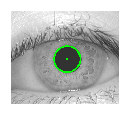

In [101]:
vis.plot_images_grid(images[:len(images)], 5, 6)

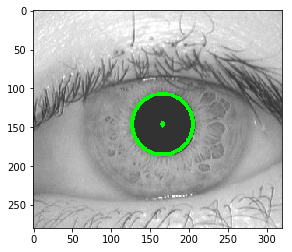

In [102]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [103]:
print(circles)
for i in range(len(circles)):
    circles[0][2]=circles[0][2]*2
print(circles)

[[166, 146, 38]]
[[166, 146, 76]]


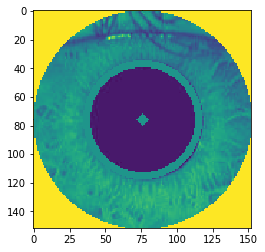

In [105]:


images=np.array(images)
os.mkdir('croppedimg/1')
for i in range(len(images)):
    canvas=np.full(images.shape[1:],255)
    for j in range(images.shape[1]):
        for k in range(images.shape[2]):
            d=math.sqrt(math.pow((k-circles[i][0]),2)+math.pow((j-circles[i][1]),2))
            if(abs(d)<=circles[i][2]):
                canvas[j][k][0]=images[i][j][k][0]
                canvas[j][k][1]=images[i][j][k][1]
                canvas[j][k][2]=images[i][j][k][2]
    newcanvas=np.full((2*circles[i][2],2*circles[i][2],3),255)
    a=circles[i][0]-circles[i][2]
    b=circles[i][1]-circles[i][2]
    for j in range(2*circles[i][2]):
        for k in range(2*circles[i][2]):
            newcanvas[j][k][0]=canvas[b+j][a+k][0]
            newcanvas[j][k][1]=canvas[b+j][a+k][1]
            newcanvas[j][k][2]=canvas[b+j][a+k][2]
    newcanvas=newcanvas.astype('uint8')     
    newcanvas=cv2.cvtColor(newcanvas,cv2.COLOR_BGR2GRAY)
     
    plt.imshow(newcanvas)
    plt.show()
    newcanvas=Image.fromarray(newcanvas)
    newcanvas=newcanvas.resize((500,500))
    newcanvas.save('croppedimg/1/result'+str(i)+'.jpg')
                

In [106]:
os.mkdir('transformed/1')
for i in range(len(images)):
    os.system('convert  croppedimg/1/result'+str(i)+'.jpg +distort DePolar 0 transformed/1/resultpolar'+str(i)+'.jpg')

In [171]:
for i in range(1):
    image=Image.open('transformed/1/resultpolar'+str(i)+'.jpg')
    image=image.crop((100,140,700,250))
    image=np.array(image)

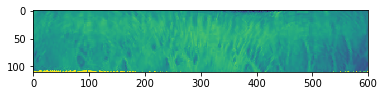

In [217]:
imagesharp=np.array(image)
kernel = np.array([[-1,-1,-1], 
                   [-1, 31,-1],
                   [-1,-1,-1]])

sharpened = cv2.filter2D(imagesharp, -1, kernel) # applying the sharpening kernel to the input image & displaying it.
plt.imshow(imagesharp)
plt.show()
temp1=Image.fromarray(imagesharp)
temp1.save('feature1.jpg')
imagesharp=cv2.bitwise_not(imagesharp)
temp2=Image.fromarray(imagesharp)
temp2.save('feature2.jpg')

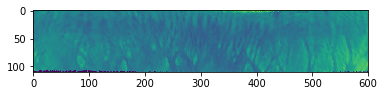

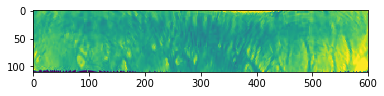

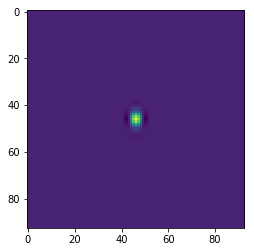

In [218]:

g_kernel = cv2.getGaborKernel((30,30), 0.30, np.pi*20, 1.0, .47, 0, ktype=cv2.CV_32F)

filtered_img = cv2.filter2D(imagesharp, cv2.CV_8UC3, g_kernel)

plt.imshow(imagesharp)
plt.show()

plt.imshow(filtered_img)
plt.show()
filtered_img=Image.fromarray(filtered_img)
filtered_img.save('test.jpg')
filtered_img.show()
h, w = g_kernel.shape[:2]
g_kernel = cv2.resize(g_kernel, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)
plt.imshow( g_kernel)
plt.show()


In [221]:

m1= Image.open('test.jpg')
m1.show()
m1=np.array(m1)

kernel = np.array([[-1,-1,-1], 
                   [-1, 11,-1],
                   [-1,-1,-1]])

sharpened = cv2.filter2D(m1, -1, kernel) # applying the sharpening kernel to the input image & displaying it.

m1=cv2.bitwise_not(m1)
m1.astype('uint8')
m1=Image.fromarray(m1)
m1.show()
m1.save('final.jpg')
   